<a href="https://colab.research.google.com/github/jaidatta71/Chatbot/blob/main/Module_2_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.flush_and_unmount()

In [ ]:
pip install pandas

To load the loan50 dataset into a pandas DataFrame in Google Colab, you'll first need to upload the dataset to your Colab environment. Here's a step-by-step guide to do that:

Upload the File to Google Colab:

Open your Google Colab notebook.
Click on the folder icon on the left sidebar to open the Files tab.
Click on "Upload" and select the loan50.csv file from your computer (.../loan50.csv).
Load the Data using Pandas:

Once the file is uploaded, you can load it into a DataFrame using pandas. Here's the code you can use in a cell in your Google Colab notebook:

In [ ]:
import pandas as pd

# Load the data into a DataFrame
loan_data = pd.read_csv('sample_data/loans_full_schema.csv')

# Display the first few rows of the DataFrame
loan_data.head()


,rownames,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,1,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,2,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,4,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,5,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


The data from the `loan50.csv` file has been loaded successfully, and it appears we have several columns that can be used to determine the various characteristics of the loans. Here are the relevant columns based on your question:


In [ ]:
loan_data.shape

(10000, 56)

In [ ]:
# Verify column names
print(loan_data.columns)  # Check for 'application_type' or similar



Index(['rownames', 'emp_title', 'emp_length', 'state', 'homeownership',
       'annual_income', 'verified_income', 'debt_to_income',
       'annual_income_joint', 'verification_income_joint',
       'debt_to_income_joint', 'delinq_2y', 'months_since_last_delinq',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_

In [ ]:
# Calculate total number of loans
total_loans = len(loan_data)

# Calculate number of joint applications
# Assuming 'annual_income_joint' being not null indicates a joint application
joint_applications = loan_data['annual_income_joint'].notna().sum()

# Calculate number of loans with a mortgage
with_mortgage = (loan_data['homeownership'] == 'MORTGAGE').sum()

# Calculate number of loans that are both joint applications and have a mortgage
both_characteristics = loan_data[(loan_data['annual_income_joint'].notna()) &
                                  (loan_data['homeownership'] == 'MORTGAGE')].shape[0]

# Print calculated values
print(f"Total loans: {total_loans}")
print(f"Joint applications: {joint_applications}")
print(f"With mortgage: {with_mortgage}")
print(f"Both characteristics (joint applications and with mortgage): {both_characteristics}")



Total loans: 10000
Joint applications: 1495
With mortgage: 4789
Both characteristics (joint applications and with mortgage): 950


This script uses the pandas library to filter and calculate the required values based on the conditions provided. Let's execute this code to get the results. ​​

Here are the results based on the `loans_full_schema.csv` data:

Total loans: 10,000
Joint applications: 1,495
With mortgage: 4,789
Both characteristics (joint applications and with mortgage): 950

* (a) Use our Venn diagram from above to determine the probability a randomly drawn loan from the loans data set is from a joint application where the couple had a mortgage?
* (b) What is the probability that the loan had either of these attributes?

In [ ]:
# Calculate the probability of a loan being from a joint application where the couple had a mortgage
probability_joint_mortgage = both_characteristics / total_loans

# Output the probability
probability_joint_mortgage


0.095

To determine the probability that a randomly drawn loan from the dataset is from a joint application where the couple had a mortgage, we use the classical probability formula:

$ P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of outcomes}} $

Here:
- **Favorable outcomes**: Loans that are both joint applications and have a mortgage.
- **Total outcomes**: Total number of loans in the dataset.

Given:
- **Both characteristics (joint applications and with mortgage)**: $950$
- **Total loans**: $10,000$

The probability $ P(A) $ can be calculated as follows:

$ P(A) = \frac{950}{10,000} =0.095 $


In [ ]:
# Calculate the probability of a joint application
prob_joint_applications = joint_applications / total_loans

# Calculate the probability of having a mortgage
prob_with_mortgage = with_mortgage / total_loans

# Calculate the probability of either event occurring (joint application or having a mortgage)
probability_either = prob_joint_applications + prob_with_mortgage - probability_joint_mortgage

# Output the probability
probability_either


0.5334

To determine the probability that a randomly drawn loan from the dataset had either the attribute of being a joint application or having a mortgage (or both), we use the formula for the probability of the union of two events:

$ P(A \cup B) = P(A) + P(B) - P(A \cap B) $

Where:
- $ P(A) $ is the probability of a joint application.
- $ P(B) $ is the probability of having a mortgage.
- $ P(A \cap B) $ is the probability of both being a joint application and having a mortgage.

Given:
- **Joint applications** $ P(A) : 1,495$
- **With mortgage** $ P(B) : 4,789$
- **Both characteristics** $ P(A \cap B) : 950$
- **Total loans**: $10,000$

We can calculate the probability $ P(A \cup B) $ as follows:

$P(A \cup B) = \frac{1495}{10000} + \frac{4789}{10000} - \frac{950}{10000} $


In [ ]:
# Define income categories
bins = [0, 25000, 50000, 100000, float('inf')]
labels = ['$0-25k', '$25k-50k', '$50k-100k', '$100k+']

# Categorize annual income into ranges
loan_data['income_range'] = pd.cut(loan_data['annual_income'], bins=bins, labels=labels, right=False)

# Calculate the probability distribution of the income ranges
income_distribution = loan_data['income_range'].value_counts(normalize=True).sort_index()

# Print the probability distribution
print(income_distribution)

income_range
$0-25k       0.0443
$25k-50k     0.2412
$50k-100k    0.4822
$100k+       0.2323
Name: proportion, dtype: float64


# **PROBABILITY DISTRIBUTIONS**
* Bins and Labels : We define the bins that represent the edges of the income ranges and labels for each bin.
* Categorizing Income: The `pd.cut` function categorizes the `annual_income` into specified ranges.
* Probability Distribution: Using `value_counts` with `normalize=True` computes the relative frequencies of the income ranges, giving us the probability distribution.

This distribution shows that nearly half of the loans in the dataset are associated with annual incomes between \$50,000 and \$100,000.

### Histogram Plot
Here's the histogram showing the probability distribution of the income ranges. This visual representation helps illustrate the proportions of each income category within the dataset.

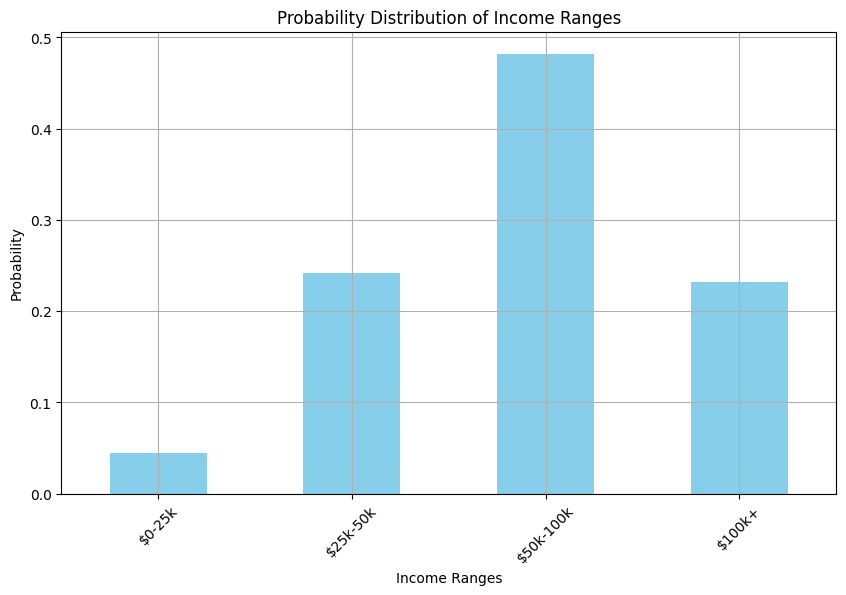

In [ ]:
import matplotlib.pyplot as plt

# Plotting the histogram for the income distribution
income_distribution.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Probability Distribution of Income Ranges')
plt.xlabel('Income Ranges')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Dice Sum Probabilities:

To create a plot of the probability distribution for the sum of two dice, we first need to calculate the probabilities for each possible sum, ranging from 2 (minimum sum, when both dice show 1) to 12 (maximum sum, when both dice show 6).

Each die has 6 faces, so there are a total of $6×6=36$ outcomes when two dice are rolled. We'll calculate the frequency of each sum and then convert these frequencies to probabilities by dividing by the total number of outcomes.

Steps to Create the Plot:
* Calculate Frequency of Each Sum: We'll simulate rolling two dice and calculate how often each sum occurs.
* Convert Frequencies to Probabilities: Divide each frequency by the total number of outcomes (36) to get probabilities.
* Plot the Probability Distribution: Use matplotlib to plot these probabilities.

To create a probability distribution plot for the sum of two dice, we calculate the probability of each possible sum and then plot these probabilities. Each die has 6 faces, leading to a total of \(6 \times 6 = 36\) possible outcomes. Here's how the sums range:

- **Sum of 2**: 1 way ($1+1$)
- **Sum of 3**: 2 ways ($1+2, 2+1$)
- **Sum of 4**: 3 ways ($1+3, 2+2, 3+1$)
- **Sum of 5**: 4 ways ($1+4, 2+3, 3+2, 4+1$)
- **Sum of 6**: 5 ways ($1+5, 2+4, 3+3, 4+2, 5+1$)
- **Sum of 7**: 6 ways ($1+6, 2+5, 3+4, 4+3, 5+2, 6+1$)
- **Sum of 8**: 5 ways ($2+6, 3+5, 4+4, 5+3, 6+2$)
- **Sum of 9**: 4 ways ($3+6, 4+5, 5+4, 6+3$)
- **Sum of 10**: 3 ways ($4+6, 5+5, 6+4$)
- **Sum of 11**: 2 ways ($5+6, 6+5$)
- **Sum of 12**: 1 way ($6+6$)

This distribution shows that certain sums are more likely than others, with the highest probability centered around the sum of 7.


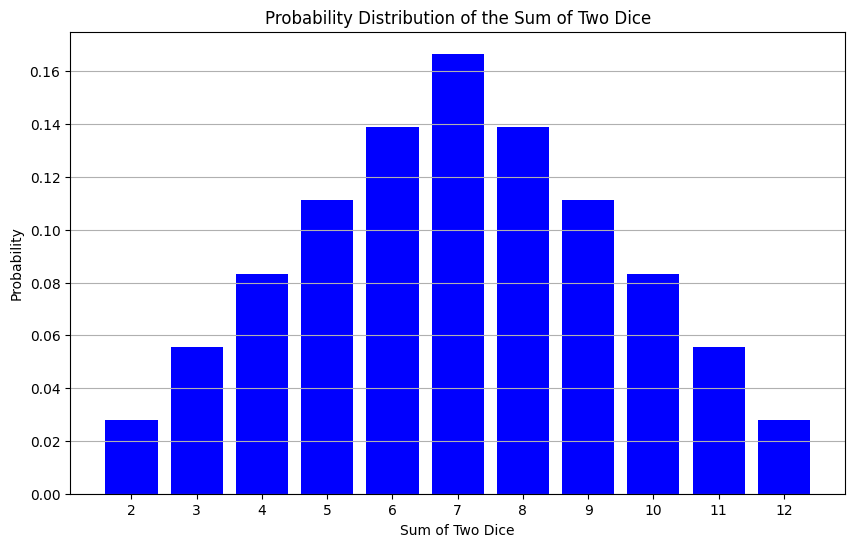

In [ ]:
import matplotlib.pyplot as plt

# Possible sums from two dice rolls
sums = range(2, 13)

# Count of ways to achieve each sum
counts = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]

# Total number of outcomes when rolling two dice
total_outcomes = 36

# Probability for each sum
probabilities = [count / total_outcomes for count in counts]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(sums, probabilities, color='blue')
plt.title('Probability Distribution of the Sum of Two Dice')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.xticks(sums)
plt.grid(axis='y')
plt.show()

# **Conditional Probability**

### Smallpox Data

The dataset titled "Smallpox in Boston, 1721" includes data on 6,224 individuals exposed to smallpox during that year in Boston. Some of the individuals were inoculated, which was an early form of vaccination involving exposure to a controlled form of the disease, believed at the time to reduce the likelihood of death. This dataset contains records on whether each individual lived or died, and whether they were inoculated.

For more details on the data and to access the dataset itself, you can visit OpenIntro's page directly through [this link](https://https://www.openintro.org/data/index.php?data=smallpox) to the Smallpox dataset. This resource is part of their effort to provide accessible educational materials and data sets for statistical analysis.

In [ ]:
import pandas as pd

# Load the data into a DataFrame
spx_data = pd.read_csv('sample_data/smallpox.csv')

# Display the first few rows of the DataFrame
spx_data.head()

,result,inoculated
0,lived,yes
1,lived,yes
2,lived,yes
3,lived,yes
4,lived,yes


To create count tables for the results of the smallpox data, showing the counts of outcomes for each category of inoculation, we can use the pandas library in Python to generate a contingency table.

In [ ]:
# Create a contingency table with row and column totals
count_table_totals = pd.crosstab(index=spx_data['inoculated'], columns=spx_data['result'], margins=True, margins_name="Total")

# Display the contingency table with totals
print("Count Table with Totals:")
print(count_table_totals)

Count Table with Totals:
result      died  lived  Total
inoculated                    
no           844   5136   5980
yes            6    238    244
Total        850   5374   6224


To create a probability table with totals based on the count tables for the smallpox data, we will need to compute the probabilities by dividing each count by the total number of cases. We will also include the totals for each category and the overall total.

In [ ]:
# Create a count table with row and column totals
count_table_totals = pd.crosstab(index=spx_data['inoculated'], columns=spx_data['result'], margins=True, margins_name="Total")

# Calculate the total number of cases from the count table
total_cases = count_table_totals.at["Total", "Total"]

# Convert count table to proportion table
proportion_table_totals = count_table_totals / total_cases

# Display the proportion table with totals
print("Proportion Table with Totals:")
print(proportion_table_totals)

Proportion Table with Totals:
result          died     lived     Total
inoculated                              
no          0.135604  0.825193  0.960797
yes         0.000964  0.038239  0.039203
Total       0.136568  0.863432  1.000000


#### **EXAMPLE: PASSING THE TEST**

Consider the midterm and final for a statistics class. Suppose 13% of students earned an A on the midterm. Of those students who earned an A on the midterm, 47% received an A on the final, and 11% of the students who earned lower than an A on the midterm received an A on the final. You randomly pick up a final exam and notice the student received an A. What is the probability that this student earned an A on the midterm?

### Problem Setup and Bayes' Theorem Application

We are given the following probabilities:
- $ P(A) $: Probability of getting an A on the midterm = 13% = 0.13.
- $ P(B | A) $: Probability of getting an A on the final given an A on the midterm = 47% = 0.47.
- $ P(B | A^c) $: Probability of getting an A on the final given NOT an A on the midterm = 11% = 0.11.
- $ P(A^c) $: Probability of NOT getting an A on the midterm = $1 -  P(A) = 0.87.$




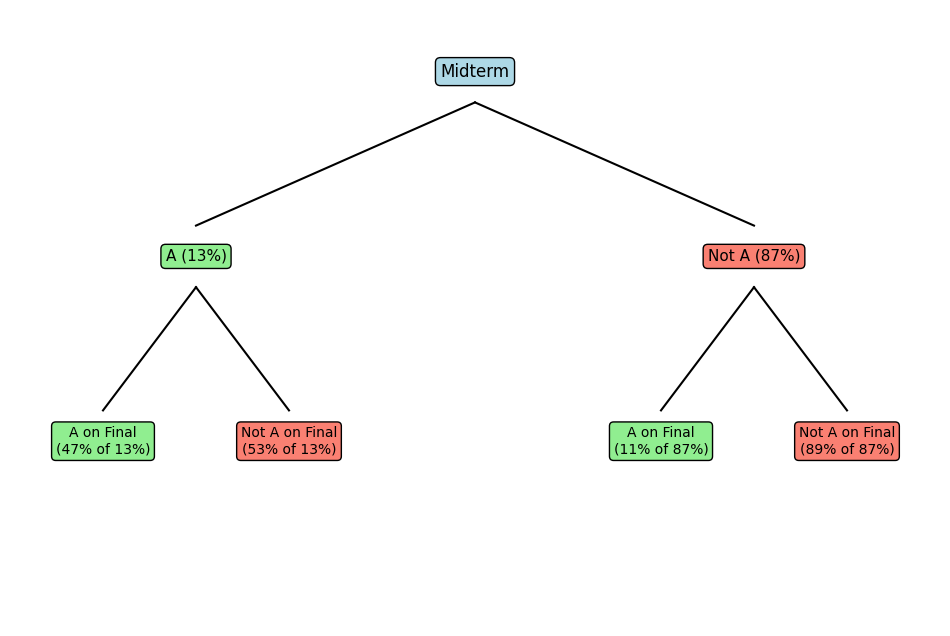

In [ ]:
import matplotlib.pyplot as plt

# Define the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Points for midterm outcomes
ax.text(0.5, 0.9, 'Midterm', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightblue'))
ax.text(0.2, 0.6, 'A (13%)', ha='center', va='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.8, 0.6, 'Not A (87%)', ha='center', va='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='salmon'))

# Points for final outcomes based on midterm A
ax.text(0.1, 0.3, 'A on Final\n(47% of 13%)', ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.3, 0.3, 'Not A on Final\n(53% of 13%)', ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='salmon'))

# Points for final outcomes based on midterm Not A
ax.text(0.7, 0.3, 'A on Final\n(11% of 87%)', ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.9, 0.3, 'Not A on Final\n(89% of 87%)', ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='salmon'))

# Drawing lines
ax.plot([0.5, 0.2], [0.85, 0.65], 'black')
ax.plot([0.5, 0.8], [0.85, 0.65], 'black')
ax.plot([0.2, 0.1], [0.55, 0.35], 'black')
ax.plot([0.2, 0.3], [0.55, 0.35], 'black')
ax.plot([0.8, 0.7], [0.55, 0.35], 'black')
ax.plot([0.8, 0.9], [0.55, 0.35], 'black')

# Hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate probabilities
P_A = 0.13
P_B_given_A = 0.47
P_B_given_not_A = 0.11
P_not_A = 1 - P_A
P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)
P_A_given_B = (P_B_given_A * P_A) / P_B

# Print probability
print(f"Probability that the student earned an A on the midterm, given they got an A on the final: {P_A_given_B:.4f}")



Probability that the student earned an A on the midterm, given they got an A on the final: 0.3897


We use Bayes' Theorem to find $P(A | B) $, the probability of having an A on the midterm given an A on the final:

$ P(B) = P(B | A) \times P(A) + P(B | A^c) \times P(A^c) $

$ P(B) = (0.47 \times 0.13) + (0.11 \times 0.87) $

$ P(B) = 0.0611 + 0.0957 = 0.1568 $

$ P(A | B) = \frac{P(B | A) \times P(A)}{P(B)} = \frac{0.0611}{0.1568} \approx 0.3898 $

This calculates to approximately $38.98%$, indicating the probability that a student got an A on the midterm if they got an A on the final.

## **BAYES THEOREM**

### EXAMPLE: BREAST CANSER

In Canada, about 0.35% of women over 40 will develop breast cancer in any given year. A common screening test for cancer is the mammogram, but this test is not perfect. In about 11% of patients with breast cancer, the test gives a false negative: it indicates a woman does not have breast cancer when she does have breast cancer. Similarly, the test gives a false positive in 7% of patients who do not have breast cancer: it indicates these patients have breast cancer when they actually do not. If we tested a random woman over 40 for breast cancer using a mammogram and the test came back positive – that is, the test suggested the patient has cancer – what is the probability that the patient actually has breast cancer?

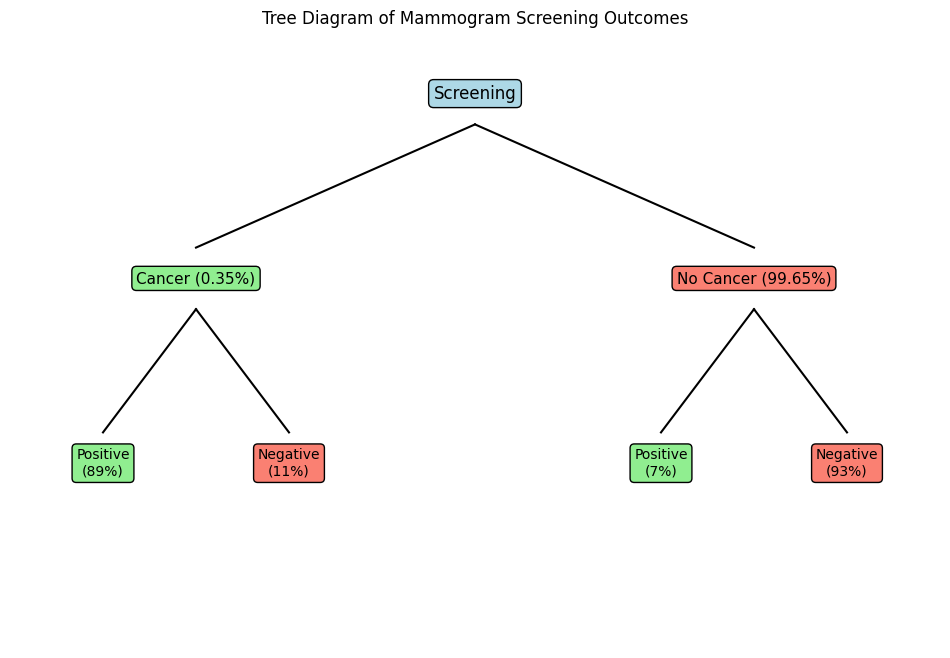

In [ ]:
import matplotlib.pyplot as plt

# Define the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Points for overall screening outcomes
ax.text(0.5, 0.9, 'Screening', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightblue'))
ax.text(0.2, 0.6, 'Cancer (0.35%)', ha='center', va='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.8, 0.6, 'No Cancer (99.65%)', ha='center', va='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='salmon'))

# Points for mammogram outcomes based on cancer presence
ax.text(0.1, 0.3, 'Positive\n(89%)', ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.3, 0.3, 'Negative\n(11%)', ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='salmon'))

# Points for mammogram outcomes based on no cancer
ax.text(0.7, 0.3, 'Positive\n(7%)', ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.9, 0.3, 'Negative\n(93%)', ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='salmon'))

# Drawing lines to connect nodes
ax.plot([0.5, 0.2], [0.85, 0.65], 'black')  # Line from Screening to Cancer
ax.plot([0.5, 0.8], [0.85, 0.65], 'black')  # Line from Screening to No Cancer
ax.plot([0.2, 0.1], [0.55, 0.35], 'black')  # Line from Cancer to Positive
ax.plot([0.2, 0.3], [0.55, 0.35], 'black')  # Line from Cancer to Negative
ax.plot([0.8, 0.7], [0.55, 0.35], 'black')  # Line from No Cancer to Positive
ax.plot([0.8, 0.9], [0.55, 0.35], 'black')  # Line from No Cancer to Negative

# Hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')  # Turn off the axis

plt.title("Tree Diagram of Mammogram Screening Outcomes")
plt.show()




Bayes' Theorem allows us to update our probability estimates based on new evidence. In this scenario, we are dealing with the following events:
- $A$: the woman has breast cancer.
- $B$: the mammogram test is positive.

Given probabilities:
- $P(A)$ = Probability of having breast cancer = 0.35% = 0.0035.
- $P(B | A)$ = Probability of a positive test given having breast cancer = 89% = 0.89 (100% - 11% false negative rate).
- $P(B | A^c)$ = Probability of a positive test given not having breast cancer = 7% = 0.07 (false positive rate).

We need to calculate $P(B)$, the total probability of a positive test:
$$P(B) = P(B | A) \times P(A) + P(B | A^c) \times P(A^c)$$

Then, we apply Bayes' Theorem to find $P(A | B)$:
$$P(A | B) = \frac{P(B | A) \times P(A)}{P(B)}$$

This will give us the probability that the patient actually has breast cancer given a positive test result.


In [ ]:
# Importing the required library
import numpy as np

# Given probabilities
P_A = 0.0035  # Probability of having breast cancer
P_B_given_A = 0.89  # Probability of a positive test given having breast cancer
P_B_given_not_A = 0.07  # Probability of a positive test given not having breast cancer

# Calculating P(A^c)
P_not_A = 1 - P_A

# Calculating P(B)
P_B = P_B_given_A * P_A + P_B_given_not_A * P_not_A

# Applying Bayes' Theorem to find P(A | B)
P_A_given_B = (P_B_given_A * P_A) / P_B

# Printing the results
print(f"Total probability of a positive test (P(B)): {P_B:.4f}")
print(f"Probability of having breast cancer given a positive test (P(A | B)): {P_A_given_B:.4f}")


Total probability of a positive test (P(B)): 0.0729
Probability of having breast cancer given a positive test (P(A | B)): 0.0427
